
# Home Assignment 2
## Data Science IV, Summer Semester 2021
### Instructor: Johannes Wachs
----
### Instructions 

Please work in pairs of two students: each group should register with me via email by April 15th. If you cannot find a partner, please contact me.

Answer the following questions with a mixture of code (Python 3) and markdown cells, as appropriate. Your submission should be a Jupyter notebook (.ipynb). Your notebook should run from beginning to end - please test this before you submit. You may use libraries or code written in class, unless specifically noted otherwise.

Submit your solutions via Learn by ***23.59pm April 30th 2021***. Late submissions are accepted for 12 hours following the deadline, with 1/3 of the total possible points deducted from the score.

It is ok to borrow code from online sources and the in-class demonstrations, if you cite all your sources. Plagiarism will result in an automatic score of 0 points.

### Please fill in:
Student 1 name: me 

WU Student 1 ID: me 

----
### Task 1: Importance of Python packages (25 points)
![title](data/pypi.png)




In this task you will highlight the most important packages in the Python ecosystem. Python has a package manager called PyPi. When you install Python packages (for example: pip install pandas to install Pandas), PyPi does the work for you it.

PyPi insures that insures that you have all the requirements and that there are no conflicts. Using data collected from PyPi (credit: http://kgullikson88.github.io/blog/pypi-analysis.html), please analyze the network of dependencies between packages:

- read in the data in pypi_dependencies.csv. Create directed graph and add the edges: a package should point to its requirements.
- Calculate the in-degrees of all the nodes. Plot the distribution on a log-log scale.
- Calculate the out-degrees of all the nodes. Plot the distribution on a log-log scale.
- Calculate the Pagerank and report the top 25 libraries. Do you recognize any of them?
- Draw the network of dependencies among the top 100 libraries according to Pagerank. Include only non-isolated nodes. For bonus points (3): draw the network hierarchically using the graphviz_layout extension for NetworkX plotting (you may need to install graphviz on your computer!).
- Suppose an evil developer can hack into any package and insert a virus. The virus spreads through dependencies - if A depends on B, and B is infected, then A will be infected too. For each package in the top 200 (according to Pagerank), start a virus there and count how many packages will be infected (if allowed to spread to the full dependency network!). Hint: use NetworkX's ancestor function. Calculate the correlation between the Pagerank score of the nodes with the count of failing downstream packages.


In [1]:
# libraries required for whole assignment

# data manipulation libraries
import networkx as nx
import pandas as pd
import numpy as np

# helper libs
import random
from scipy.stats import pearsonr, spearmanr

# visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
import imageio
import os

In [ ]:
## Note: we used some of the code from class and modified it

# Task 1
## 1.1

In [2]:
df = pd.read_csv('data/pypi_dependencies.csv', sep=',') # reading in the data and takinga look into it
df

,package_name,requirement
0,115wangpan,beautifulsoup4
1,115wangpan,homura
2,115wangpan,humanize
3,115wangpan,pycurl
4,115wangpan,pysocks
...,...,...
73593,zymbit-trequests,requests
73594,zymbit-trequests,tornado
73595,zymbit-trequests,tornalet
73596,zzzeeksphinx,mako


In [3]:
edges_list = list(zip(df.package_name, df.requirement)) # edges tuple list
G = nx.DiGraph(edges_list) # directed graph

## 1.2 & 1.3

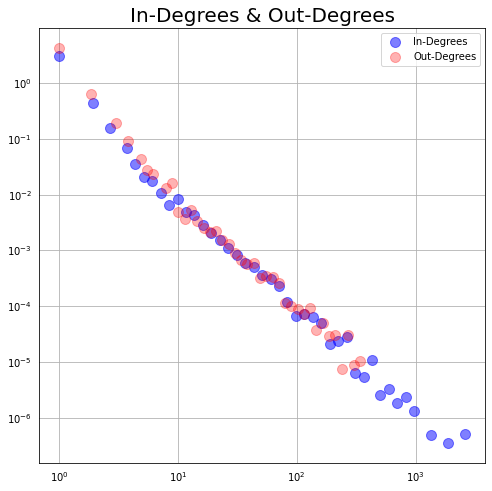

In [4]:
# Figure settings
plt.figure(figsize=(8, 8))

# In-Degrees
data = list(dict(G.in_degree).values())
bin_edges = np.logspace(np.log10(min(data)+1), np.log10(max(data))) # minimum appears to be 0 so we need to add +1
density, _ = np.histogram(data, bins=bin_edges, density=True)
plt.loglog(bin_edges[:-1],
           density, marker='o',
           linestyle='none',
           label='In-Degrees',
           color='blue',
           alpha=.5,
           markersize=10)

# Out-Degrees
data2 = list(dict(G.out_degree).values())
bin_edges = np.logspace(np.log10(min(data2)+1), np.log10(max(data2))) # minimum appears to be 0 so we need to add +1
density, _ = np.histogram(data, bins=bin_edges, density=True)
plt.loglog(bin_edges[:-1],
           density, marker='o',
           linestyle='none',
           label='Out-Degrees',
           color='red',
           alpha=.3,
           markersize=10)

# Plot styling and "cleaning"
plt.title('In-Degrees & Out-Degrees', fontdict={'fontsize': 20})
plt.tick_params(axis='both', which='both', bottom=False, left=False)
plt.legend()
plt.grid()
plt.show()

## 1.4

In [5]:
ranks = nx.pagerank(G)
sorted(ranks.items(), key=lambda pckg: pckg[1], reverse=True)[:25]
# we are familiar with requests, numpy, django, flask, jinja2 templating engine, pytest, six, argparse, click and nose

[('distribute', 0.029638582543667257),
 ('requests', 0.027806525508763145),
 ('django', 0.020534000407553214),
 ('sphinx', 0.015221339948962572),
 ('six', 0.012830270166172254),
 ('pyyaml', 0.008043489317628338),
 ('numpy', 0.006920479797043652),
 ('pytest', 0.006739681867863373),
 ('flask', 0.006664681093206531),
 ('cython', 0.005856939892352388),
 ('wheel', 0.004927050059182737),
 ('nose', 0.004803506798250151),
 ('pytest-cov', 0.004700727164999709),
 ('twisted', 0.004294336654042239),
 ('lxml', 0.004286907674420632),
 ('py', 0.004253729214182815),
 ('httpbin', 0.0038675355687126144),
 ('pytest-httpbin', 0.0038613541255081113),
 ('jinja2', 0.0035178495189009317),
 ('argparse', 0.0034757843181496277),
 ('simplejson', 0.003337467907792625),
 ('mock', 0.003217744067132445),
 ('docopt', 0.0030914676863218094),
 ('python-dateutil', 0.0029693254958204733),
 ('click', 0.0029515229985854455)]

## 1.5

Nr. of isolated nodes in top 100: 52


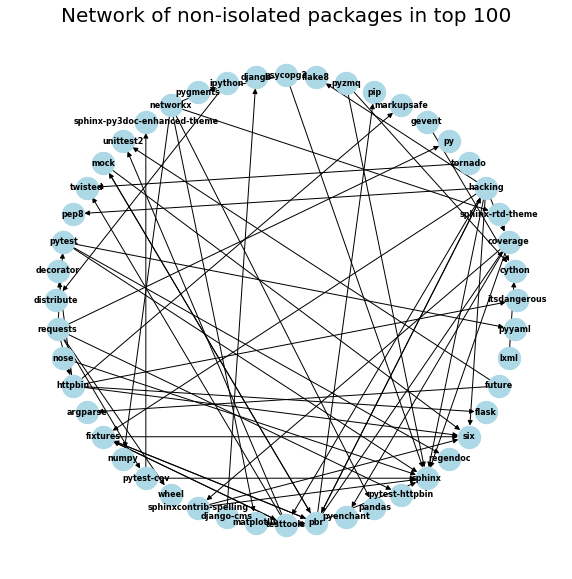

In [6]:
# list of names of top 100 packages
top_100 = sorted(ranks, key=ranks.get, reverse=True)[:100]

# top 100 Graph
G_top100 = nx.subgraph(G, top_100).copy()

isolates_in_top100 = list(nx.isolates(G_top100)) # list of names of isolated nodes
print('Nr. of isolated nodes in top 100:', len(isolates_in_top100))

G_top100_no_isolates = nx.subgraph(G, nbunch=[node for node in top_100 if node not in isolates_in_top100]).copy() # new graph with only non-isolated nodes in top 100

# Ploting
plt.figure(figsize=(10, 10))
plt.title('Network of non-isolated packages in top 100', size=20)
pos = nx.layout.circular_layout(G_top100_no_isolates)
nx.draw(G_top100_no_isolates, pos=pos, node_color='lightblue', node_size=500)
labels = nx.draw_networkx_labels(G_top100_no_isolates, pos=pos, font_weight='bold', font_color='black', font_size=8)

plt.show()


## 1.5 Bonus

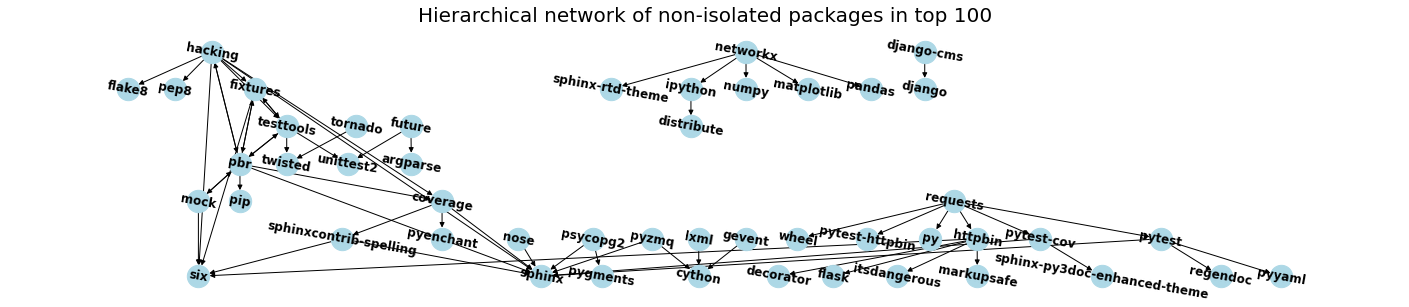

In [7]:
# setting figure size and title
plt.figure(figsize=(25, 5))
plt.title('Hierarchical network of non-isolated packages in top 100', size=20)

pos = nx.nx_pydot.graphviz_layout(G_top100_no_isolates, prog="dot")
nx.draw(G_top100_no_isolates, pos=pos, node_color='lightblue', node_size=500)
labels = nx.draw_networkx_labels(G_top100_no_isolates, pos, font_color='black', font_weight='bold')

for label in labels.values(): # rotating labels so they dont overlap with each other
    label.set_rotation(-10)
    
plt.show()

## 1.6

In [8]:
# only names of top 200 packages which we can use to search our graph
top_200_pckgs = dict(sorted(ranks.items(), key=lambda x: x[1], reverse=True)[:200]).keys()

ancestors = [len(nx.ancestors(G, pckg)) for pckg in top_200_pckgs] # packages that can be infected
page_ranks = [ranks[pckg] for pckg in top_200_pckgs] # "ranks" is assigned earlier in the notebook it is equal to 'nx.pagerank(G)'

print('Pearson correlation:', pearsonr(ancestors, page_ranks)[0]) # Pearsonr correlation function from scipy.stats module
print('Spearman correlation:', spearmanr(ancestors, page_ranks)[0]) # Spearmanr correlation function from scipy.stats

Pearson correlation: 0.5634101866915163
Spearman correlation: 0.6877744229875039


----
### Task 2: (25 points) - Robustness analysis of the Austrian Power Grid

![title](data/austrian_power_network.jpg)


(Austrian power grid, from https://www.apg.at/en/Stromnetz/APG-Netz)

In this exercise you will conduct a robustness analysis of the Austrian power grid network.

- read in the network (austrian_power_grid.csv) and plot it, labeling the nodes.
- 50 times, simulate the random removal, one node at a time, of 40 nodes. After each removal, record the share of nodes in the giant connected component of the remaining graph. Hint: make a copy of the graph before each new simulation.
- Plot the results of all 50 simulations: on the x-axis plot the integers 1 to 40. On the y axis plot the share of nodes in the giant connected component of the remaining graph. Each simulation should be plotted in its own line. Color these lines grey with alpha = .3. Then plot the average number of nodes in the giant connected component at each integer on the same graph in red.
- Repeat the simulation and plotting exercise with a targeted removal instead of random removal. Specifically, calculate the degree of each node in the initial graph, and remove them in descending order, starting with the highest degree node first. Do not recalculate the node degrees after each removal. Add the plot of the curve of this simulation to the previous plot, highlighting the targeted attack curve in a different color.
- Reflect on your results: does random failure or targeted failure present a bigger risk to the Austrian power grid? Which stations should be given extra maintenance checks and protection?


# Task 2
## 2.1

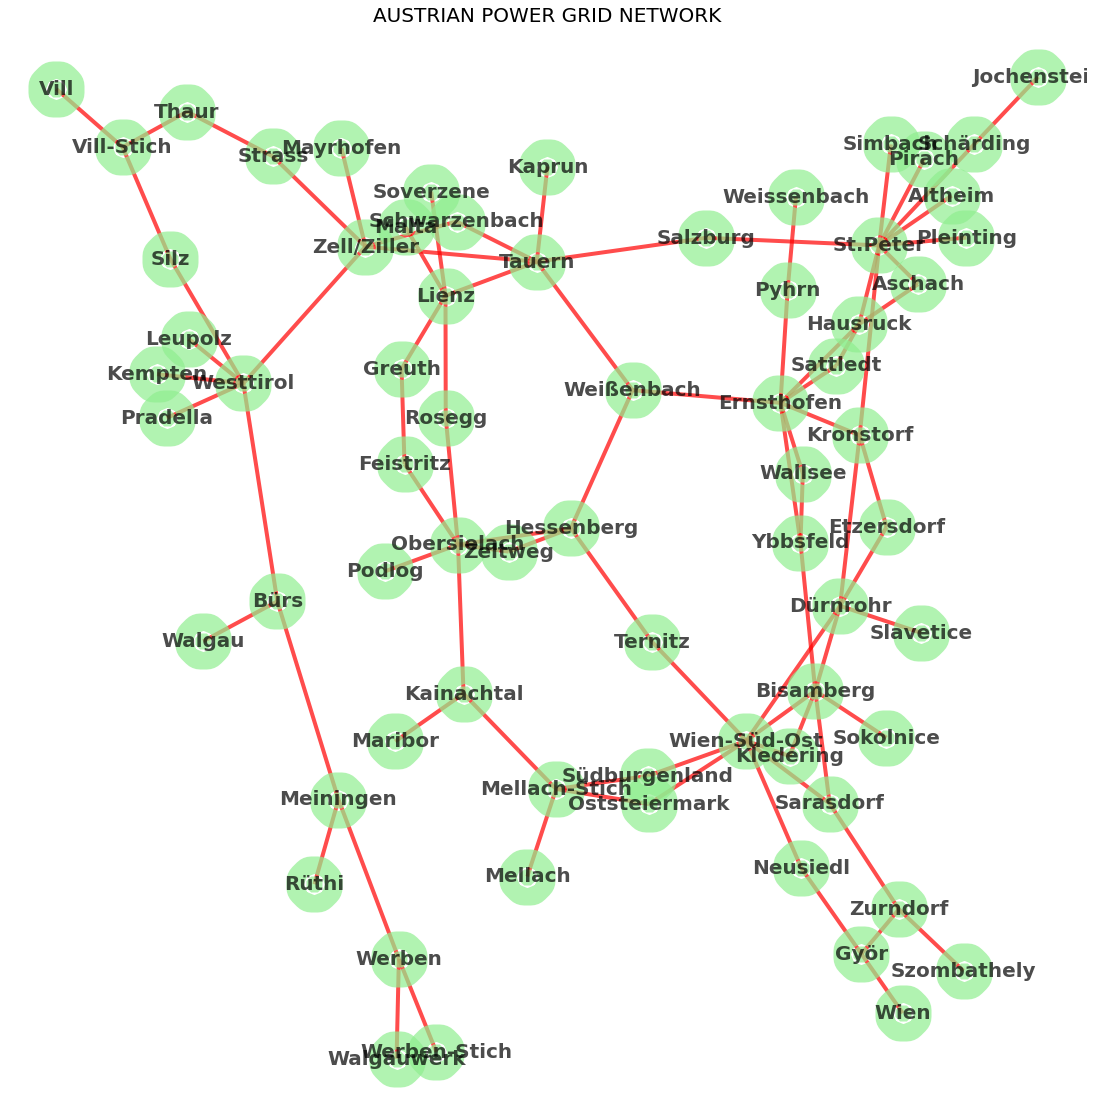

In [9]:
"""read in the network (austrian_power_grid.csv) and plot it, labeling the nodes."""

df = pd.read_csv('data/austrian_power_grid.csv')
G = nx.from_pandas_edgelist(df, 'A', 'B') # another way to read in data for graph with pandas

plt.figure(figsize=(15, 15))
nx.draw(G, with_labels=True, node_size=300, node_color="lightgreen", node_shape="8", alpha=0.7, linewidths=40, edge_color='red', font_weight='bold', font_size=20, font_color='black', width=4) # we played a bit with styling
plt.title('AUSTRIAN POWER GRID NETWORK', size=20)
plt.show()

## 2.2 & 2.3

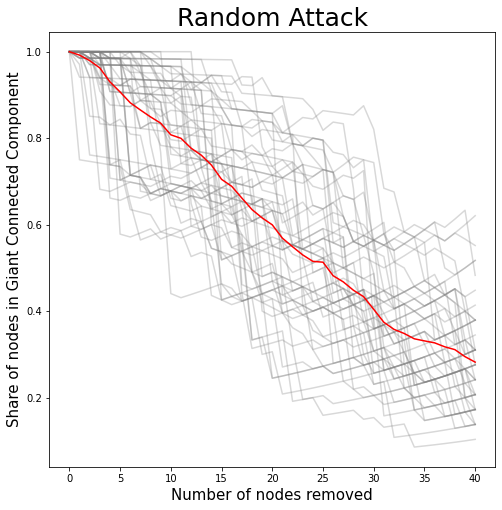

In [10]:
# Running simulation
simulation = []
for _ in range(50):
    copy = G.copy()
    gcc_share = [1, ] # 1 needs to be added so we have 100% on 0 removed nodes
    for _ in range(40):
        to_remove = random.choice(list(copy.nodes())) # random attack
        copy.remove_node(to_remove)
        gcc_share.append(len(sorted(nx.connected_components(copy), key=len, reverse=True)[0])/len(copy)) # share of nodes - https://stackoverflow.com/questions/26105764/how-do-i-get-the-giant-component-of-a-networkx-graph
    simulation.append(gcc_share)

# Plotting results of simulation
plt.figure(figsize=(8, 8))
plt.title('Random Attack', size=25)
plt.ylabel('Share of nodes in Giant Connected Component', size=15)
plt.xlabel('Number of nodes removed', size=15)

for s in simulation:
    plt.plot(s, color='grey', alpha=.3)

avg = list(pd.DataFrame(simulation).apply(np.mean))
plt.plot(avg, color='red')
plt.show()

## 2.4 & 2.5

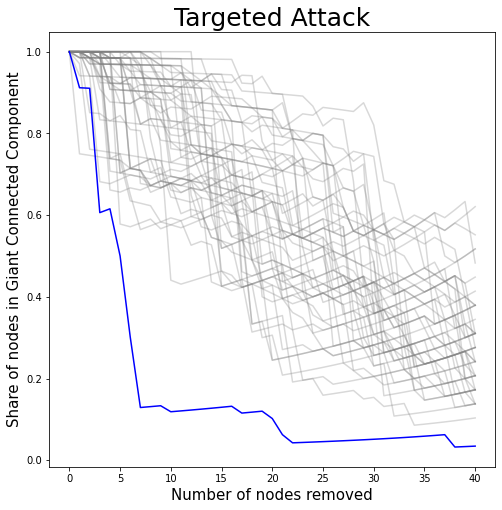

These 7 are most important grids in Austrian power grid network and should be given extra protection and higher maintenance:

St.Peter - 9
Wien-Süd-Ost - 8
Ernsthofen - 7
Bisamberg - 6
Obersielach - 6
Tauern - 6
Westtirol - 6


In [11]:
grids_sorted = [x[0] for x in sorted(list(G.degree), key=lambda x: x[1], reverse=True)]
copy = G.copy()

targeted_attack = [1, ] # 1 needs to be added so we have 100% share on 0 removed nodes
for _ in range(40):
    to_remove = grids_sorted.pop(0)
    copy.remove_node(to_remove)
    targeted_attack.append(len(sorted(nx.connected_components(copy), key=len, reverse=True)[0])/len(copy))

# Plotting result
plt.figure(figsize=(8, 8))
plt.title('Targeted Attack', size=25)
plt.ylabel('Share of nodes in Giant Connected Component', size=15)
plt.xlabel('Number of nodes removed', size=15)
    
for s in simulation: # plotting each simulation
    plt.plot(s, color='grey', alpha=.3)

plt.plot(targeted_attack, color='blue') # plotting targeted attack
plt.show()

print('These 7 are most important grids in Austrian power grid network and should be given extra protection and higher maintenance:\n')
grids_sorted = [x for x in sorted(list(G.degree), key=lambda x: x[1], reverse=True)] # Since we used 'pop' we need to recreate list of sorted nodes by degree
for grid in grids_sorted[:7]:
    print(grid[0], '-', grid[1])

----
### Task 3: Spreading illness on a social network (50 points)

In this exercise you will analyze the spread of an illness on a social network of a small town and the effect of reducing contacts.

- Read in the social network's edgelist (social_network.csv). The undirected edges denote friendship and contact.
- Plot the network
- Write a function to simulate an epidemic:

---- On day 1 a random node is infected.

---- Every day, each infected node spreads the infection to each neighbor with probability 0.1.

---- The simulation ends after 50 days. Nodes that become infected, stay infected.

---- The function should return a vector of the share of nodes infected each day.

- Simulate 50 epidemics. Plot the spreading curves: on the x-axis plot the days, and on the y axis plot the share of nodes infected. Each simulated epidemic should be its own curve.

- Plot in red the average share of infected nodes on each day across the 50 simulations.

In [12]:
social_network_edges = pd.read_csv('data/social_network.csv')
G = nx.Graph()
G.add_edges_from(social_network_edges.values)

In [13]:
def simulate_epidemic(network, gif=False):
    
    intialization = {node:'H' for node in network.nodes()} # each patient is healthy at the beginning, therefore H as `Healthy`
    nx.set_node_attributes(network, intialization, 'state') # adding that attribute to each node
    
    patient_0 = random.choice(list(network.nodes())) # patient zero is a random node
    network.nodes[patient_0]['state'] = 'I' # I as `Infected`
    
    pos = nx.spring_layout(network) # positions
    nx.set_node_attributes(network, pos, 'positions')
    
    share_of_infected = []
    for day in range(1, 51): # since we have on 1st day patient zero, we are gonna start from day 1 and go to day 50
        
        if gif:
            # plotting current state and saving it for making a gif
            fig = plt.figure(figsize=(8, 8))
            color_map = {} # for displaying different colors for different states of nodes
            for node in network.nodes():
                if network.nodes[node]['state'] == 'H':
                    color_map[node] = 'green'
                else:
                    color_map[node] = 'red'
                    
            nx.draw(network, pos=nx.get_node_attributes(network, 'positions'), node_color=list(color_map.values()), node_size=100)
            plt.figtext(0, 1, f'Day {day}', size=15) # adding day on upper right corner
            plt.savefig(f"data/images/{day}.png", bbox_inches="tight") # saving figure for making animation later in function
            plt.close() # closing figure
            
        n_nodes = network.number_of_nodes() # for calculating avarage number of infected
        node_states = nx.get_node_attributes(network, 'state')
        num_infected = 0
        for node in node_states:
            if node_states[node] == 'I':
                num_infected += 1
        share_of_infected.append(num_infected/n_nodes)
        
        # spreading infection
        for node in network.nodes():
            if node_states[node] == 'H':
                for neighbor in network.neighbors(node): # checking neighbours
                    if node_states[neighbor] == 'I':
                        if random.random() < .1: 
                            network.nodes[node]['state'] = 'I'
       
    if gif:
        with imageio.get_writer('data/network.gif', mode='I') as writer:
            for day in range(1, 51):
                writer.append_data(imageio.imread(f'data/images/{day}.png'))
        
    return share_of_infected

# since we realized we have to reuse this function for later exercises we modified it with gif parameter, so it doesn't make gif out of plots on each call if not explicitly told so
# gif is outputed with markdown cell, if you wish to see if it works uncomment line below and it will createa a new one in `data` directory
# simulate_pandemic(G, gif=True)

![network](data/network.gif "Spreading of infection across network")

In [14]:
for idx, share in enumerate(simulate_epidemic(G), 1):
    print(f'Day {idx}:', round(share*100, 2), '%')

Day 1: 0.33 %
Day 2: 1.67 %
Day 3: 3.33 %
Day 4: 6.0 %
Day 5: 8.33 %
Day 6: 11.67 %
Day 7: 16.0 %
Day 8: 21.67 %
Day 9: 28.0 %
Day 10: 35.33 %
Day 11: 44.33 %
Day 12: 54.33 %
Day 13: 66.33 %
Day 14: 75.33 %
Day 15: 82.0 %
Day 16: 88.33 %
Day 17: 91.67 %
Day 18: 95.67 %
Day 19: 98.67 %
Day 20: 99.67 %
Day 21: 100.0 %
Day 22: 100.0 %
Day 23: 100.0 %
Day 24: 100.0 %
Day 25: 100.0 %
Day 26: 100.0 %
Day 27: 100.0 %
Day 28: 100.0 %
Day 29: 100.0 %
Day 30: 100.0 %
Day 31: 100.0 %
Day 32: 100.0 %
Day 33: 100.0 %
Day 34: 100.0 %
Day 35: 100.0 %
Day 36: 100.0 %
Day 37: 100.0 %
Day 38: 100.0 %
Day 39: 100.0 %
Day 40: 100.0 %
Day 41: 100.0 %
Day 42: 100.0 %
Day 43: 100.0 %
Day 44: 100.0 %
Day 45: 100.0 %
Day 46: 100.0 %
Day 47: 100.0 %
Day 48: 100.0 %
Day 49: 100.0 %
Day 50: 100.0 %


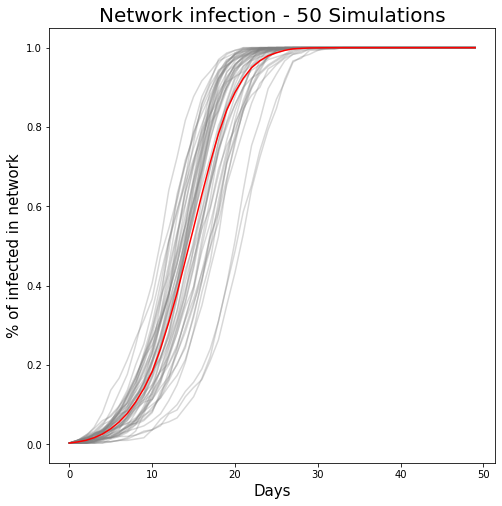

In [15]:
fig = plt.figure(figsize=(8, 8))

simulations = np.zeros(50)
for _ in range(50):
    simulation = simulate_epidemic(G)
    plt.plot(simulation, alpha=.3, color='grey')
    simulations += np.array(simulation)

avg = simulations / 50 # average share of infected per day across all simulations
plt.plot(avg, color='red')
plt.xlabel('Days', size=15)
plt.ylabel('% of infected in network', size=15)
plt.title('Network infection - 50 Simulations', size=20)
plt.show()

### Part 2: 
- Revisit the analysis with social distancing: each node is allowed at most K connections. 

---- Write a function to edit the social network called social_distancing. The function should make a copy of your graph. For each node with more than K connections, randomly remove edges until they have at most K connections. Be careful to recalculate the node degrees after each node has its excess connections cut.

---- For each of K = 3,5,7, create a socially-distanced copy of the social network. Run the epidemic 50 times on each social network, recording the share of nodes infected every day.

---- Plot the average share of infected nodes on each day across the 50 simulations for each value of K.

---- Reflect: As a policymaker- what restriction would you impose on social contacts?

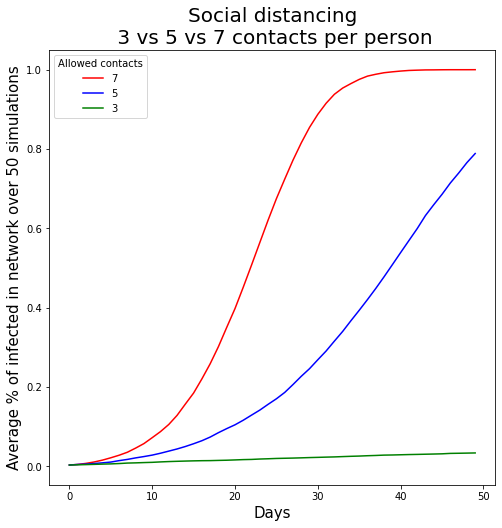

In [16]:
# Function that simulates social distancing e.i. removes nodes
def social_distancing(network, K):
    copy = network.copy()
    for i in range(copy.number_of_nodes()):
        neighbors = [n for n in copy.neighbors(i)]
        while len(neighbors) > K:
            to_remove = random.choice(neighbors)
            copy.remove_edge(i, to_remove)
            neighbors.remove(to_remove)
    return copy

# helper function to easier get average share of infected nodes on each day across simulations
def daily_average(network, K):
    simulations = np.zeros(50)
    for _ in range(50):
        new_network = social_distancing(network, K)
        simulations += simulate_epidemic(new_network) # simulating epidemic on new network that practices social distancing
    return simulations / 50


low_restrictions = daily_average(G, 7)
mid_restrictions = daily_average(G, 5)
strict_restrictions = daily_average(G, 3)

plt.figure(figsize=(8, 8))
plt.plot(low_restrictions, label='7', color='red')
plt.plot(mid_restrictions, label= '5', color='blue')
plt.plot(strict_restrictions, label='3', color='green')
plt.legend(title='Allowed contacts')
plt.ylabel('Average % of infected in network over 50 simulations', size=15)
plt.xlabel('Days', size=15)
plt.title('Social distancing\n 3 vs 5 vs 7 contacts per person', size=20)
plt.show()

Looking at the graph it is pretty obvious that restriction with max 3 contacts has the best results and therefore we would impose this one.

### Part 3: 
- Revisit the analysis with a vaccine. Suppose we develop a vaccine, but can only make 50 of them.

---- Write an updated function to simulate an epidemic spread which takes as an input a list of nodes which are vaccinated and immune to the virus. The nodes with the vaccine cannot be infected and cannot spread the virus.

---- On the original network, simulate 50 epidemics. Each time, pick 50 random nodes to vaccinate. Plot the average share of nodes infected every day. Be sure that the first person to have the illness is not vaccinated.

---- Repeat the experiment (simulating 50 epidemics), giving the vaccine to the 50 nodes with highest degree. Plot the average share of nodes infected every day.

---- Plot all three curves on the same plot. Describe what is happening. Does the targeted vaccine strategy make a significant difference in the outcomes?

---- Increase the number of vaccines to 100, rerun the analyses (plotting all three results curves on the same plot again). Do we see a difference?


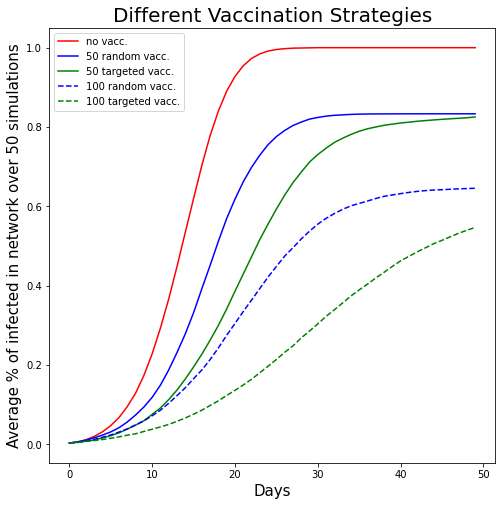

In [17]:
def random_vacc(network, patient_0, num):
    """helper function to get n random nodes vaccinated"""
    nodes = list(network.nodes())
    nodes = [node for node in nodes if node != patient_0] # excluding patient 0
    vaccinated = random.sample(nodes, num)
    return vaccinated

def targeted_vacc(network, patient_0, num):
    """helper function to get list of n targeted vaccinated nodes"""
    sorted_nodes = [node[0] for node in sorted(list(G.degree), key=lambda x: x[1], reverse=True) if node[0] != patient_0] # excluding patient 0
    vaccinated = sorted_nodes[:num]
    return vaccinated

def simulate_epidemic_with_vacc(network, vaccinated, num):
    intialization = {node:'H' for node in network.nodes()} # each patient is healthy at the beginning, therefore H as `Healthy`
    nx.set_node_attributes(network, intialization, 'state') # adding that attribute to each node
    
    patient_0 = random.choice(list(network.nodes())) # patient zero is a random node
    network.nodes[patient_0]['state'] = 'I' # I as `Infected`
    
    for node in vaccinated(network.copy(), patient_0, num): # vacinnating nodes that are in `vacinnated` list - helper functions apply here
        network.nodes[node]['state'] = 'V' # V for Vaccine
    
    pos = nx.spring_layout(network) # positions
    nx.set_node_attributes(network, pos, 'positions')
    
    share_of_infected = [] 
    n_nodes = network.number_of_nodes() # for calculating average number of infected
    for day in range(1, 51): # since we have on 1st day patient zero, we are gonna start from day 1 and go to day 50
        node_states = nx.get_node_attributes(network, 'state')
        num_infected = 0
        for node in node_states:
            if node_states[node] == 'I':
                num_infected += 1
        share_of_infected.append(num_infected/n_nodes)
        
        # spreading infection, this stays the same as it was, since vaccinated nodes can't get infected and can't spread infection
        for node in network.nodes():
            if node_states[node] == 'H':
                for neighbor in network.neighbors(node): # checking neighbours
                    if node_states[neighbor] == 'I':
                        if random.random() < .1: 
                            network.nodes[node]['state'] = 'I'

    return share_of_infected

plt.figure(figsize=(8, 8))
# plotting without vaccincaiton
outcomes = np.zeros(50)
for _ in range(50):
    simulation = simulate_epidemic(G)
    outcomes += np.array(simulation)
plt.plot(outcomes/50, color='red', label='no vacc.')

# random vaccincation plotting
outcomes = np.zeros(50)
for _ in range(50):
    simulation = simulate_epidemic_with_vacc(G, random_vacc, 50)
    outcomes += np.array(simulation)
plt.plot(outcomes/50, color='blue', label='50 random vacc.')

# targeted vaccincation plotting
outcomes = np.zeros(50)
for _ in range(50):
    simulation = simulate_epidemic_with_vacc(G, targeted_vacc, 50)
    outcomes += np.array(simulation)
plt.plot(outcomes/50, color='green', label='50 targeted vacc.')

# random vaccincation plotting
outcomes = np.zeros(50)
for _ in range(50):
    simulation = simulate_epidemic_with_vacc(G, random_vacc, 100)
    outcomes += np.array(simulation)
plt.plot(outcomes/50, color='blue', label='100 random vacc.', ls='--')

# targeted vaccincation plotting
outcomes = np.zeros(50)
for _ in range(50):
    simulation = simulate_epidemic_with_vacc(G, targeted_vacc, 100)
    outcomes += np.array(simulation)
plt.plot(outcomes/50, color='green', label='100 targeted vacc.', ls='--')

plt.title('Different Vaccination Strategies', size=20)
plt.xlabel('Days', size=15)
plt.ylabel('Average % of infected in network over 50 simulations', size=15)
plt.legend()
plt.show()

We can see that vaccinaction has effect and the more people are vaccinated the better it is for the network of small town. Difference between targeted and random vaccination when only 50 people are vaccinated is not that significant but when we have 100 people vaccinated the results are a bit more significant. If we compare this graph with above one (social distancing) we can se that social distancing with max 3 peers gives the best results. But ofcourse that is not the ultimate solution for stopping a pandemic in long term.